## **Project Title : Sentiment Analysis on IMDb Movie Reviews**



**Problem Statement : The goal of this project is to build deep learning models to predict the sentiment (positive or negative) of movie reviews from the IMDb dataset. By analyzing the text of the reviews, we aim to classify them as either positive or negative based on the words and patterns in the text.**


 Step 1: Install & Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM, GRU, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


 Step 2: Load and Preprocess IMDb Dataset

In [2]:
# Load data
df = pd.read_csv("/content/IMDB Dataset.csv")

# Encode sentiments
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 200  # Truncate or pad to 200 words
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

vocab_size = len(tokenizer.word_index) + 1


 Step 3: Define CNN, RNN, and GRU Models

CNN Model

In [7]:
def create_cnn():
    model = Sequential([
        Embedding(vocab_size, 128, input_length=max_len),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


 RNN Model

In [8]:
def create_rnn():
    model = Sequential([
        Embedding(vocab_size, 128, input_length=max_len),
        SimpleRNN(64),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

 GRU Model

In [9]:
def create_gru():
    model = Sequential([
        Embedding(vocab_size, 128, input_length=max_len),
        GRU(64),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


 Step 4: Train All Models

In [12]:
cnn_model = create_cnn()
rnn_model = create_rnn()
gru_model = create_gru()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
history_cnn = cnn_model.fit(X_train_pad, y_train, epochs=3, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 548ms/step - accuracy: 0.6920 - loss: 0.5643 - val_accuracy: 0.8765 - val_loss: 0.2862
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 135s 539ms/step - accuracy: 0.9215 - loss: 0.2095 - val_accuracy: 0.8992 - val_loss: 0.2465
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 144s 547ms/step - accuracy: 0.9787 - loss: 0.0852 - val_accuracy: 0.8919 - val_loss: 0.2830


In [14]:
history_rnn = rnn_model.fit(X_train_pad, y_train, epochs=3, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 89s 345ms/step - accuracy: 0.6097 - loss: 0.6350 - val_accuracy: 0.8224 - val_loss: 0.4007
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 139s 334ms/step - accuracy: 0.8682 - loss: 0.3209 - val_accuracy: 0.8069 - val_loss: 0.4713
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 340ms/step - accuracy: 0.9092 - loss: 0.2348 - val_accuracy: 0.8267 - val_loss: 0.4366


In [15]:
history_gru = gru_model.fit(X_train_pad, y_train, epochs=3, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 202s 774ms/step - accuracy: 0.6908 - loss: 0.5478 - val_accuracy: 0.8701 - val_loss: 0.3091
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 182s 699ms/step - accuracy: 0.9111 - loss: 0.2307 - val_accuracy: 0.8861 - val_loss: 0.2883
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 201s 693ms/step - accuracy: 0.9518 - loss: 0.1354 - val_accuracy: 0.8780 - val_loss: 0.3136


 Step 5: Evaluate Models on Test Set

In [17]:
def evaluate_model(model, X_test, y_test, name):
    preds = (model.predict(X_test) > 0.5).astype("int32")
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc * 100:.2f}%")
    print(classification_report(y_test, preds))

evaluate_model(cnn_model, X_test_pad, y_test, "CNN")
evaluate_model(rnn_model, X_test_pad, y_test, "RNN")
evaluate_model(gru_model, X_test_pad, y_test, "GRU")


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step

CNN Accuracy: 88.95%
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4961
           1       0.93      0.85      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step

RNN Accuracy: 82.99%
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4961
           1       0.83      0.83      0.83      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step

GRU Accuracy: 88.53%
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4961
           1       0.90      0.87      0.88 

 Step 6: Predict and Visualize Sample Outputs

In [18]:
def predict_sample(model, tokenizer, text, label):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_len)
    pred = model.predict(padded)[0][0]
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"Review: {text[:300]}...")
    print(f"Actual: {'Positive' if label == 1 else 'Negative'} | Predicted: {sentiment} ({pred:.2f})")
    print("-" * 60)

# Show 3 predictions per model
for i in range(3):
    sample_idx = np.random.randint(0, len(X_test))
    text = X_test.iloc[sample_idx]
    label = y_test.iloc[sample_idx]

    print(f"\nSample {i+1} - CNN")
    predict_sample(cnn_model, tokenizer, text, label)

    print(f"\n Sample {i+1} - RNN")
    predict_sample(rnn_model, tokenizer, text, label)

    print(f"\n Sample {i+1} - GRU")
    predict_sample(gru_model, tokenizer, text, label)



Sample 1 - CNN
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Review: This was a very good movie and is absolutely unfair to judge it without taking into account the time when it was released. There are some movies which do not get older but this is clearly out of date. However, I saw this film when I was a boy and for more than twenty years both the images as the sto...
Actual: Positive | Predicted: Negative (0.02)
------------------------------------------------------------

 Sample 1 - RNN
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Review: This was a very good movie and is absolutely unfair to judge it without taking into account the time when it was released. There are some movies which do not get older but this is clearly out of date. However, I saw this film when I was a boy and for more than twenty years both the images as the sto...
Actual: Positive | Predicted: Negative (0.11)
------------------------------------------------------------

 Sample 1 - GRU
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/ste

 Step 7: Plot Accuracy and Loss for All Models

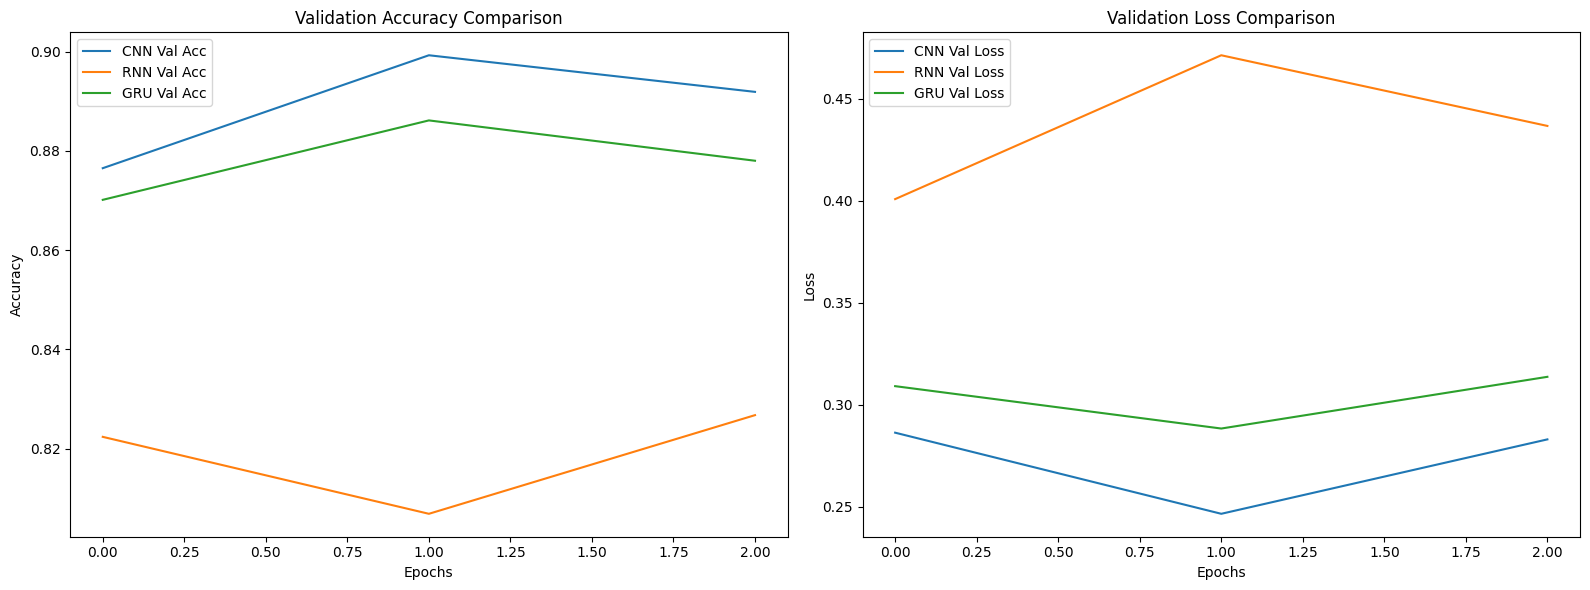

In [19]:
def plot_history(histories, model_names):
    plt.figure(figsize=(16, 6))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_accuracy'], label=f'{name} Val Acc')
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_loss'], label=f'{name} Val Loss')
    plt.title('Validation Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call it
plot_history(
    [history_cnn, history_rnn, history_gru],
    ['CNN', 'RNN', 'GRU']
)


Step 8: Actual vs Predicted Graph (Confusion Matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


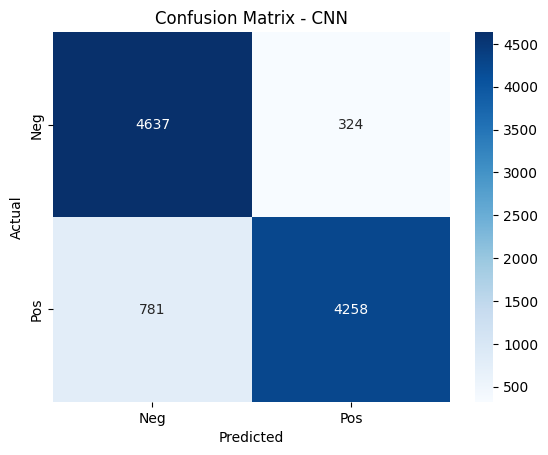

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


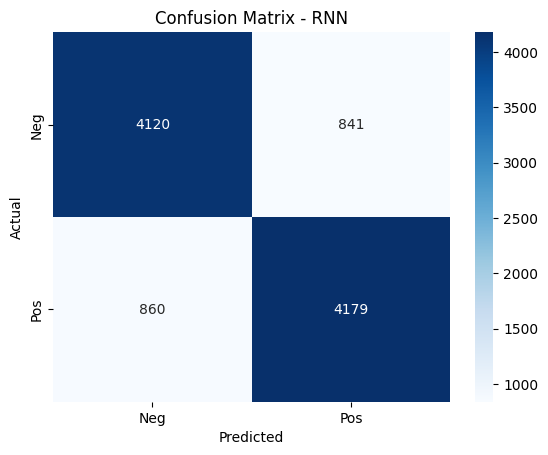

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step


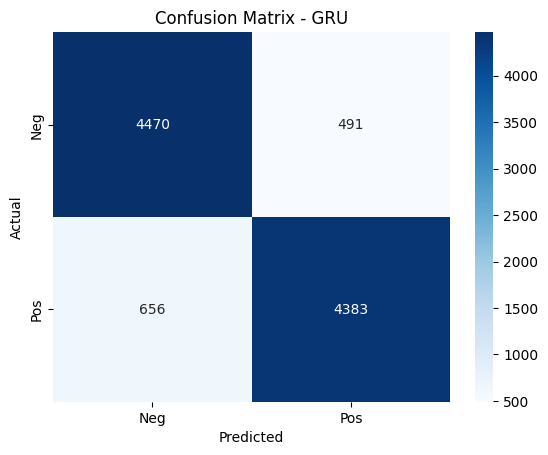

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X, y_true, title):
    y_pred = (model.predict(X) > 0.5).astype("int32")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

# Plot for each model
plot_confusion_matrix(cnn_model, X_test_pad, y_test, "CNN")
plot_confusion_matrix(rnn_model, X_test_pad, y_test, "RNN")
plot_confusion_matrix(gru_model, X_test_pad, y_test, "GRU")


Step 9: Final Accuracy Comparison Table

In [21]:
cnn_acc = accuracy_score(y_test, (cnn_model.predict(X_test_pad) > 0.5).astype("int32"))
rnn_acc = accuracy_score(y_test, (rnn_model.predict(X_test_pad) > 0.5).astype("int32"))
gru_acc = accuracy_score(y_test, (gru_model.predict(X_test_pad) > 0.5).astype("int32"))

results_df = pd.DataFrame({
    'Model': ['CNN', 'RNN', 'GRU'],
    'Accuracy (%)': [cnn_acc * 100, rnn_acc * 100, gru_acc * 100]
})

print(results_df)


313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step
  Model  Accuracy (%)
0   CNN         88.95
1   RNN         82.99
2   GRU         88.53


## **Conclusion**

The CNN model achieved the highest accuracy at 88.95%, demonstrating its strength in capturing local patterns and features from text data.

The GRU model also performed very well, with an accuracy of 88.53%, showcasing its ability to retain important information over longer sequences, though slightly less effective than CNN in this case.

The RNN model, while effective for sequence-based tasks, lagged behind with 82.99% accuracy, highlighting its limitations in handling longer dependencies compared to GRU and CNN.

**In conclusion, CNN is the most suitable model for this sentiment analysis task, followed closely by GRU.**